# Lab03: Logistic Regression.

- Student ID: 19127593
- Student name: Lê Tiến Trí

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [241]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

### Load data

In [269]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True)

In [322]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [323]:
labels=np.unique(y)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) #array stores average intensity for each label

#TODO compute average intensity for each label
r = []
for i in range(0, 10):
    r.append([])
    
d = X.sum(axis=1) / 784
for i in range(0, X.shape[0]):
    r[int(y[i])].append(d[i])

for i in range(0, 10):
    l_means[i] = sum(r[i]) / len(r[i])

print(l_means)

[44.17740512 19.40680177 38.03420776 36.15420938 30.99599983 32.95015873
 35.23486491 29.21798737 38.39790125 31.35940809]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

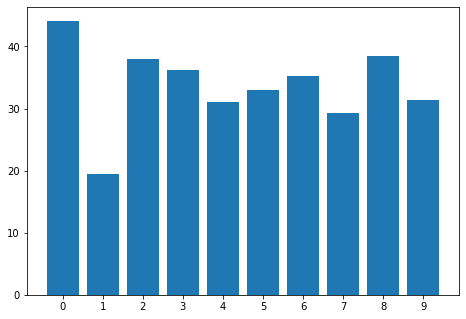

In [324]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [325]:
#TODO compute average intensity for each data sample
# intensity=?
intensity = X.sum(axis=1) / 784
print(intensity.shape)

(70000,)


Sometimes people really do not know what are they doing. I am not an exception:

In [326]:
X_flip = np.flip(X.to_numpy())
symmetry = np.mean((X-X_flip),axis=1)
print(symmetry.shape)

(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this thing works.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [484]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.vstack((intensity, symmetry)).T
print(X_new.shape) #it should be (70000,2)

(70000, 2)


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization**
  + Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.
  + We use the following formula to perform a z-score normalization on every value in a dataset: `new_value = (X – μ) / σ` (μ : Mean of data, σ : Standard deviation of data)
  + The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information
- **TODO: Why should we normalize data?**
  + we normalize when the features are in different ranges. If we have a feature within larger ranges it will influence in the model but that doesn’t mean it is more important. Also, the normalization helps to accelerate the optimization of the model.
  + Example: `gradients descent` may end up taking a long time and can oscillate back and forth and take a long time before it can finally find its way to the global/local minimum. To overcome the model learning problem, we normalize the data. We make sure that the different features take on similar ranges of values so that gradient descents can converge more quickly.

In [328]:
#TODO: normalize X_new
X_new = (X_new - X_new.mean(axis=0)) / X_new.std(axis=0)
X_new

array([[ 0.15575488, -1.15048332],
       [ 0.56751688,  0.36473248],
       [-0.77641894, -0.78703737],
       ...,
       [ 0.35252406,  0.78703737],
       [ 0.04433692, -0.36473248],
       [ 1.8060324 ,  1.15048332]])

### Construct  data

In [329]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new=np.array(y_new).reshape(-1,1)
print (X_new.shape)
print (y_new.shape)

(70000, 3)
(70000, 1)


### Split data 

In [330]:
train_X, test_X, train_y, test_y = train_test_split(X_new.astype(np.float32), y_new.astype(np.float32), test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [360]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1/(1 + np.exp(-x))
    
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    d = sigmoid_activation(x)
    return d * (1 - d)

### Compute output

In [361]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(np.dot(X,W))

def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=compute_h(W, X)
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

### **Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [478]:
def compute_gradient(h, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    gradient = (train_X.T @ error) / train_X.shape[0]
    return gradient

In [479]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        loss = -np.mean(train_y * np.log(h) + (1 - train_y) * np.log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(h, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0):
            print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [480]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 0.288
Epoch 2000, loss 0.251
Epoch 3000, loss 0.236
Epoch 4000, loss 0.226
Epoch 5000, loss 0.220
Epoch 6000, loss 0.216
Epoch 7000, loss 0.213
Epoch 8000, loss 0.211
Epoch 9000, loss 0.209
Epoch 10000, loss 0.207
Epoch 11000, loss 0.206
Epoch 12000, loss 0.205
Epoch 13000, loss 0.205
Epoch 14000, loss 0.204
Epoch 15000, loss 0.203
Epoch 16000, loss 0.203
Epoch 17000, loss 0.203
Epoch 18000, loss 0.202
Epoch 19000, loss 0.202
Epoch 20000, loss 0.202
Epoch 21000, loss 0.202
Epoch 22000, loss 0.201
Epoch 23000, loss 0.201
Epoch 24000, loss 0.201
Epoch 25000, loss 0.201
Epoch 26000, loss 0.201
Epoch 27000, loss 0.201
Epoch 28000, loss 0.201
Epoch 29000, loss 0.201
Epoch 30000, loss 0.201
Epoch 31000, loss 0.201
Epoch 32000, loss 0.201
Epoch 33000, loss 0.201
Epoch 34000, loss 0.201
Epoch 35000, loss 0.201
Epoch 36000, loss 0.201
Epoch 37000, loss 0.201
Epoch 38000, loss 0.200
Epoch 39000, loss 0.200
Epoch 40000, loss 0.200
Train err of final w:  8.08708509224934


## 3. Evaluate our model

In [481]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     41330
         1.0       0.72      0.48      0.58      5337

    accuracy                           0.92     46667
   macro avg       0.83      0.73      0.77     46667
weighted avg       0.91      0.92      0.91     46667



In [482]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     20793
         1.0       0.69      0.46      0.55      2540

    accuracy                           0.92     23333
   macro avg       0.81      0.72      0.75     23333
weighted avg       0.91      0.92      0.91     23333



**TODO: Comment on the result**

- We can see epoches and losses, gradient descent may be stuck in localminimum after runing 40000 epchoes
- Based on classification_report, `f1-score, precision and f1-score` which recognize image having no digit 1, is so high. We can conclude that the model classify effectively for image having no digit 1. However, the model does not classify well for the image containing the digit 1